# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
#URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


counter =1
call = 1

# set up lists to hold reponse info
city_list = []
lat_list = []
lng_list = []
max_temp = []
humidity = []
cloudiness_list = []
wind_speed = []
country_list = []
date_list = []

# Set a counter
counter = 0
call = 1

print("Beginning Data Retrieval")
print("------------------------------")

for city in cities:
    
        try:
            response = requests.get(query_url + city).json()
            city_list.append(response['name'])
            lat_list.append(response['coord']['lat'])
            lng_list.append(response['coord']['lon'])
            max_temp.append(response['main']['temp'])
            humidity.append(response['main']['humidity'])
            cloudiness_list.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country_list.append(response["sys"]["country"])
            date_list.append(response["dt"])
            
            if counter >49:
                #print(f'Processing Record {counter} of Set {call} | {city}')
                counter = 0
                call = call + 1
                time.sleep(1.1)
            else:
                counter += 1
                print(f'Processing Record {counter} of Set {call} | {city}')
            
        except:
            print("City not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | orsha
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | samarai
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | isangel
Processing Record 6 of Set 1 | port hardy
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | thinadhoo
Processing Record 15 of Set 1 | soyo
Processing Record 16 of Set 1 | palmer
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | lagoa
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | sakassou
Processing Record 21 of Set 1 | lasa
Processing Record 22 of Set 1 | itupiranga
Processing Record 23 of Set 1 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create a data frame
cities_df = pd.DataFrame({"City":city_list,
                          "Lat": lat_list,
                          "Lng":lng_list,
                          "Max Temp":max_temp,
                          "Humidity":humidity,
                          "Cloudiness":cloudiness_list,
                          "Wind Speed":wind_speed,
                          "Country":country_list,
                          "Date":date_list})

#Export the city data into a .csv
cities_df.to_csv("cities_data.csv", index = False)

#Display the DataFrame
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Orsha,54.5153,30.4053,50.88,77,65,10.16,BY,1653754573
1,Punta Arenas,-53.1500,-70.9167,41.11,65,40,17.27,CL,1653754573
2,Samarai,-10.6167,150.6667,78.28,71,44,10.76,PG,1653754573
3,Mataura,-46.1927,168.8643,45.48,97,22,3.11,NZ,1653754574
4,Isangel,-19.5500,169.2667,75.54,84,20,5.57,VU,1653754574
...,...,...,...,...,...,...,...,...,...
559,Tazovsky,67.4667,78.7000,42.84,70,4,13.58,RU,1653754780
560,Vao,-22.6667,167.4833,74.26,82,2,15.52,NC,1653754780
561,Zwedru,6.0667,-8.1281,84.11,73,67,3.74,LR,1653754782
562,Klerksdorp,-26.8521,26.6667,63.61,39,1,8.99,ZA,1653754782


In [5]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,19.922683,18.135570,66.251188,66.386525,53.622340,8.667181,1.653755e+09
std,34.023181,89.500934,17.126606,22.836345,38.530617,5.659528,9.434080e+01
min,-54.800000,-175.200000,18.640000,4.000000,0.000000,0.000000,1.653754e+09
25%,-8.948775,-57.239350,53.867500,52.000000,15.000000,4.270000,1.653755e+09
50%,24.405750,23.796950,66.990000,72.000000,54.500000,7.755000,1.653755e+09
75%,49.731800,97.996975,79.500000,84.000000,96.000000,11.657500,1.653755e+09
max,78.218600,179.316700,108.430000,100.000000,100.000000,32.880000,1.653755e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#Check if there are any cities that have humidity > 100%
cities_df.loc[cities_df["Humidity"] > 100]["Humidity"].count()

0

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

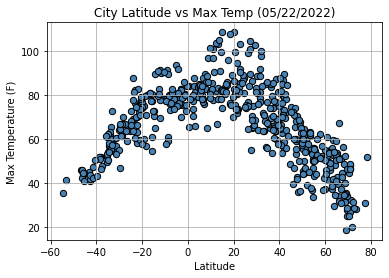

In [8]:
cities_df.plot.scatter('Lat','Max Temp', c= "steelblue", edgecolor = "black", s=40)
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs Max Temp (05/22/2022)')
plt.grid()
plt.savefig("Latitude_vs_Temperature Plot.png")
plt.show()

## Latitude vs. Humidity Plot

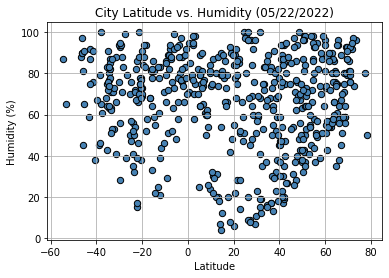

In [9]:
cities_df.plot.scatter('Lat','Humidity', c= "steelblue", edgecolor = "black", s=40)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity (05/22/2022)')
plt.grid()
plt.savefig("Latitude_vs_Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

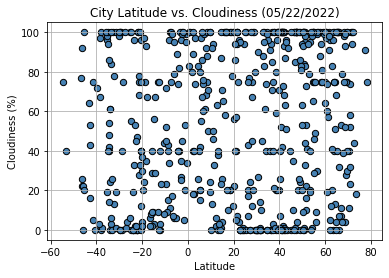

In [10]:
cities_df.plot.scatter('Lat','Cloudiness', c= "steelblue", edgecolor = "black", s=40)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Cloudiness (05/22/2022)')
plt.grid()
plt.savefig("Latitude_vs_Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

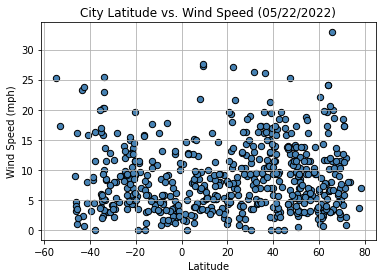

In [11]:
cities_df.plot.scatter('Lat','Wind Speed', c= "steelblue", edgecolor = "black", s=40)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Wind Speed (05/22/2022)')
plt.grid()
plt.savefig("Latitude_vs_Wind Speed Plot.png")
plt.show()

## Linear Regression

In [12]:
# Creating northern and southern hemisphere dataframe for linear regression:

northern_hem = cities_df.loc[cities_df["Lat"] >= 0]
southern_hem = cities_df.loc[cities_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8144179772715133


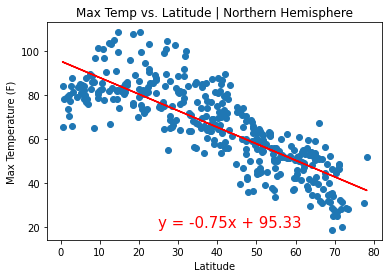

In [16]:
correlation = st.pearsonr(northern_hem['Lat'], northern_hem['Max Temp'])
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem['Lat'], northern_hem['Max Temp'])
regress_values = northern_hem['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem['Lat'], northern_hem['Max Temp'])
plt.plot(northern_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq,(25,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Max Temp vs. Latitude | Northern Hemisphere")
plt.savefig("Northern Hemisphere | Max Temp vs. Latitude Plot.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8340231685875777


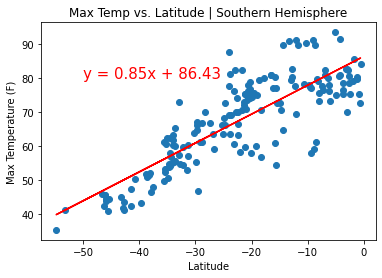

In [17]:
correlation = st.pearsonr(southern_hem['Lat'], southern_hem['Max Temp'])
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem['Lat'], southern_hem['Max Temp'])
regress_values = southern_hem['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem['Lat'], southern_hem['Max Temp'])
plt.plot(southern_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Max Temp vs. Latitude | Southern Hemisphere")
plt.savefig("Southern Hemisphere | Max Temp vs. Latitude Plot.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12422640377149996


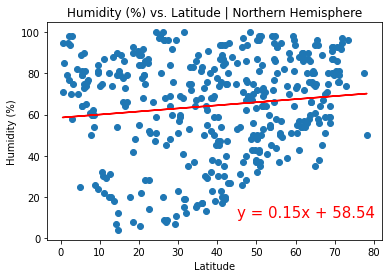

In [18]:
correlation = st.pearsonr(northern_hem['Lat'], northern_hem['Humidity'])
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem['Lat'], northern_hem['Humidity'])
regress_values = northern_hem['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem['Lat'], northern_hem['Humidity'])
plt.plot(northern_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Humidity (%) vs. Latitude | Northern Hemisphere")
plt.savefig("Northern Hemisphere | Humidity (%) vs. Latitude Plot.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.023461160634405502


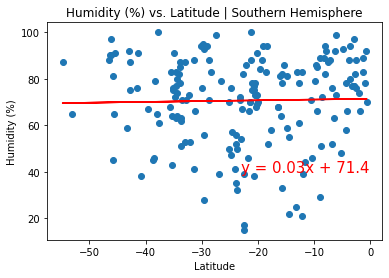

In [19]:
correlation = st.pearsonr(southern_hem['Lat'], southern_hem['Humidity'])
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem['Lat'], southern_hem['Humidity'])
regress_values = southern_hem['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem['Lat'], southern_hem['Humidity'])
plt.plot(southern_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-23,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Humidity (%) vs. Latitude | Southern Hemisphere")
plt.savefig("Southern Hemisphere | Humidity (%) vs. Latitude Plot.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07761285411623761


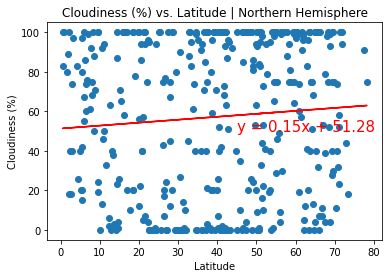

In [20]:
correlation = st.pearsonr(northern_hem['Lat'], northern_hem['Cloudiness'])
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem['Lat'], northern_hem['Cloudiness'])
regress_values = northern_hem['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem['Lat'], northern_hem['Cloudiness'])
plt.plot(northern_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness (%) vs. Latitude | Northern Hemisphere")
plt.savefig("Northern Hemisphere | Cloudiness (%) vs. Latitude Plot.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.003417093204819331


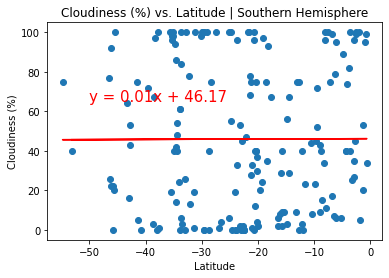

In [22]:
correlation = st.pearsonr(southern_hem['Lat'], southern_hem['Cloudiness'])
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem['Lat'], southern_hem['Cloudiness'])
regress_values = southern_hem['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem['Lat'], southern_hem['Cloudiness'])
plt.plot(southern_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,65),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness (%) vs. Latitude | Southern Hemisphere")
plt.savefig("Southern Hemisphere | Cloudiness (%) vs. Latitude Plot.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.055508764623638365


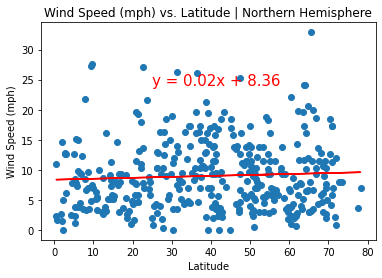

In [23]:
correlation = st.pearsonr(northern_hem['Lat'], northern_hem['Wind Speed'])
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem['Lat'], northern_hem['Wind Speed'])
regress_values = northern_hem['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem['Lat'], northern_hem['Wind Speed'])
plt.plot(northern_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq,(25,24),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed (mph) vs. Latitude | Northern Hemisphere")
plt.savefig("Northern Hemisphere | Wind Speed (mph) vs. Latitude Plot.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.25407863564252503


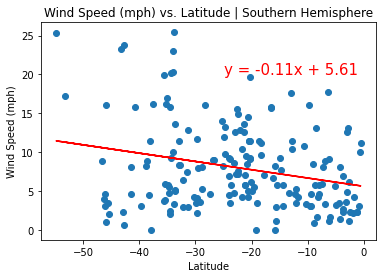

In [24]:
correlation = st.pearsonr(southern_hem['Lat'], southern_hem['Wind Speed'])
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem['Lat'], southern_hem['Wind Speed'])
regress_values = southern_hem['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem['Lat'], southern_hem['Wind Speed'])
plt.plot(southern_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed (mph) vs. Latitude | Southern Hemisphere")
plt.savefig("Southern Hemisphere | Wind Speed (mph) vs. Latitude Plot.png")
plt.show()